# Sobol indices

In [1]:
import openturns as ot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Ishigami Framework

In [2]:
from shapley.tests import Ishigami
ishigami = Ishigami()
dim = ishigami.dim
model = ishigami

### Monte-Carlo estimation using true model

In [3]:
%%time
from shapley import SobolIndices

ot.RandomGenerator.SetSeed(0)
np.random.seed(0)

n_sample = 500

sobol = SobolIndices(model.input_distribution)

# Generate the samples
sobol.build_sample(model=model, n_sample=n_sample)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 3.17 ms


In [14]:
%%time
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)

n_boot = 500
estimator = 'sobolmara'

# Indice estimation
sobol_results = sobol.compute_indices(n_boot=n_boot, estimator=estimator)
sobol_results.true_first_indices = model.first_order_sobol_indices
sobol_results.true_total_indices = model.total_sobol_indices

('First-order Sobol indices:', array([ 0.38519376,  0.49070015,  0.00951188]))
('Total Sobol indices:', array([ 0.59274408,  0.44589246,  0.27367019]))
CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 30 ms


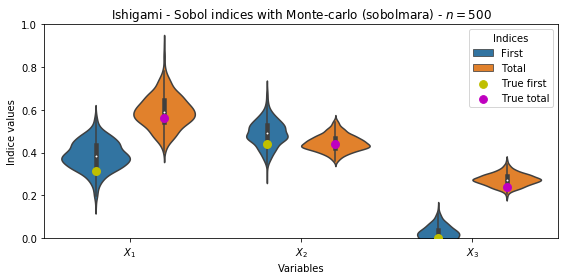

In [15]:
from shapley.plots import plot_sensitivity_results
ylim = [0., 1.]

fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_results, ax=ax)
ax.set_title("%s - Sobol indices with Monte-carlo (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()

### Monte-Carlo estimation using a Kriging model

In [16]:
from shapley.kriging import KrigingModel
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)

model_budget = 300
sampling = 'lhs'
library = 'sklearn'
kernel = 'matern'
basis = 'linear'

model_gp = KrigingModel(model=model, input_distribution=model.input_distribution)
model_gp.generate_sample(n_sample=model_budget, sampling=sampling)
model_gp.build(library=library, kernel=kernel, basis_type=basis)

In [17]:
# The score of the meta_model
q2_score_cv_gp = model_gp.compute_score_q2_cv(n_sample=10000)
print('Q2-score by cross-validation:', q2_score_cv_gp)

('Q2-score by cross-validation:', 0.93002529227993869)


In [18]:
%%time
n_realization = 500
sobol.build_sample(model=model_gp, n_sample=n_sample, n_realization=n_realization)

CPU times: user 39.6 s, sys: 892 ms, total: 40.5 s
Wall time: 5.33 s


In [19]:
%%time
# Indice estimation
sobol_gp_results = sobol.compute_indices(n_boot=n_boot, estimator=estimator)
sobol_gp_results.true_first_indices = model.first_order_sobol_indices
sobol_gp_results.true_total_indices = model.total_sobol_indices

('First-order Sobol indices:', array([ 0.37748525,  0.39810944,  0.02746308]))
('Total Sobol indices:', array([ 0.59760534,  0.43007335,  0.24223578]))
CPU times: user 6.66 s, sys: 6.66 s, total: 13.3 s
Wall time: 12.7 s


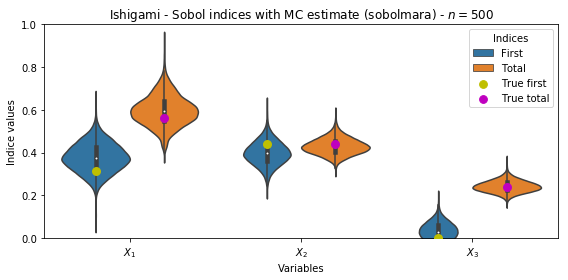

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_gp_results, ax=ax)
ax.set_title("%s - Sobol indices with MC estimate (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()

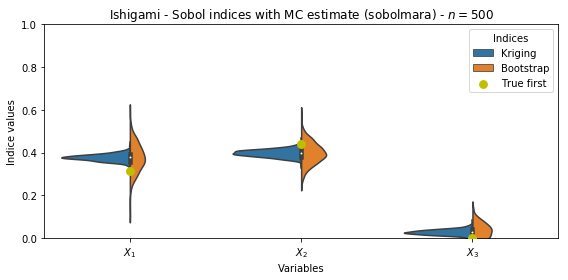

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_gp_results, ax=ax, indice='first')
ax.set_title("%s - Sobol indices with MC estimate (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()

### Monte-Carlo estimation using a Random Forest model

In [22]:
from shapley.forest import RandomForestModel
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)

model_rf = RandomForestModel(model=model, input_distribution=model.input_distribution)
model_rf.generate_sample(n_sample=model_budget, sampling=sampling)
model_rf.build(n_realization, method='random-forest')

In [23]:
# The score of the meta_model
q2_score_cv_rf = model_rf.compute_score_q2_cv(n_sample=10000)
print('Q2-score by cross-validation:', q2_score_cv_rf)

0.85475271623928817

In [24]:
%%time
sobol.build_sample(model_rf, n_sample=n_sample, n_realization=n_realization)

CPU times: user 452 ms, sys: 4 ms, total: 456 ms
Wall time: 454 ms


In [25]:
%%time
# Indice estimation
sobol_rf_results = sobol.compute_indices(n_boot=n_boot, estimator=estimator)
sobol_rf_results.true_first_indices = model.first_order_sobol_indices
sobol_rf_results.true_total_indices = model.total_sobol_indices

('First-order Sobol indices:', array([ 0.3356167 ,  0.3072634 ,  0.06768986]))
('Total Sobol indices:', array([ 0.64407438,  0.39922219,  0.37489156]))
CPU times: user 6.03 s, sys: 6.65 s, total: 12.7 s
Wall time: 12.7 s


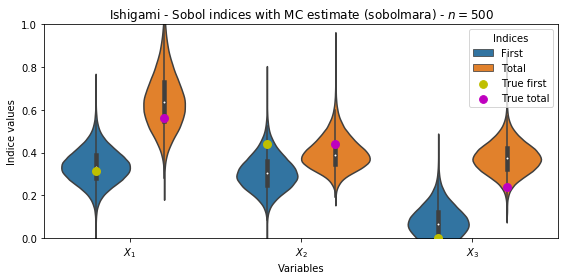

In [26]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_rf_results, ax=ax)
ax.set_title("%s - Sobol indices with MC estimate (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()

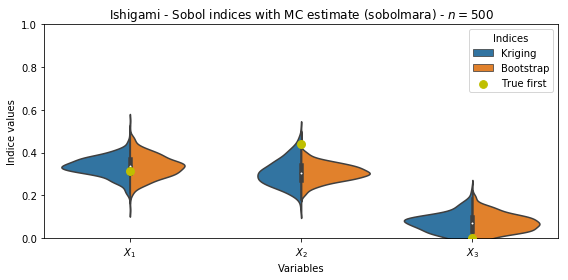

In [27]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_rf_results, ax=ax, indice='first')
ax.set_title("%s - Sobol indices with MC estimate (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()